<img width="300px" src="https://cachimbo.pe/wp-content/uploads/2022/10/1-19.jpg"></img>

#**Estadística con Python**
## **Tema: Regresión II**
#### **Docente: Giron Rene Omar A.**

---------------

# **Regresión lineal**

## **Método Matricial**

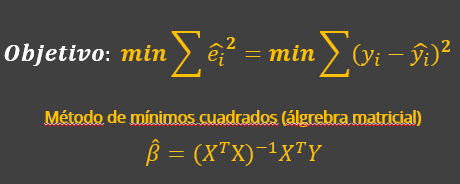

### **Simple**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def linear_regression_matrix(x, y):
    # Añadir una columna de unos a x para el término de intersección
    # X = np.vstack((np.ones(len(x)), x)).T
    # x = x.reshape(-1, 1)
    X = np.hstack((np.ones((x.shape[0], 1)), x)) #agregar una columna de "1"
    Y = y[:, np.newaxis]  # Convertir y a un vector columna

    # Calcular los parámetros de la regresión usando la ecuación normal
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y

    # intercept = beta[0, 0]
    # slope = beta[1, 0]

    return beta.flatten()

---- Algebra matricial ---
Intersección (intercept): 5.031965641400402
Pendiente (slope): 2.033153627343145
R^2: 0.9411566050982342


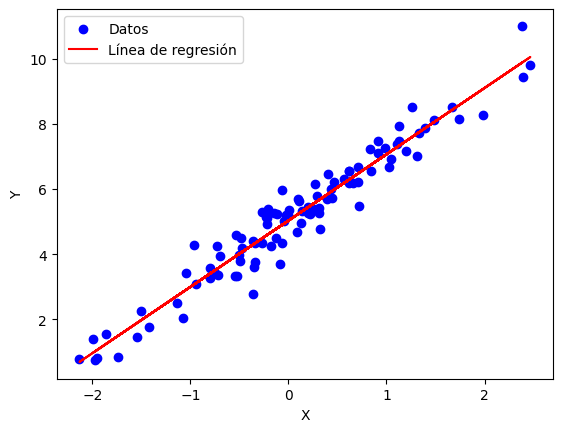

In [3]:
np.random.seed(10)
# x = np.random.uniform(0, 10, size=20)
# x = x.reshape(-1, 1)
x = np.random.randn(100, 1)
# y = 2 * x + 3 + np.random.normal(0, 1, size=20)
true_coeffs = np.array([2])
true_intercept = 5
y = true_intercept + x @ true_coeffs + np.random.randn(100) * 0.5

# Aplicar la regresión lineal
beta = linear_regression_matrix(x, y)

# Predicciones usando la línea de regresión
y_pred = beta[0] + beta[1] * x

print("---- Algebra matricial ---")
print(f"Intersección (intercept): {beta[0]}")
print(f"Pendiente (slope): {beta[1]}")
print("R^2:", r2_score(y, y_pred))

# Graficar los datos y la línea de regresión
plt.scatter(x, y, color="blue", label="Datos")
plt.plot(x, y_pred, color="red", label="Línea de regresión")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [4]:
x

array([[ 1.3315865 ],
       [ 0.71527897],
       [-1.54540029],
       [-0.00838385],
       [ 0.62133597],
       [-0.72008556],
       [ 0.26551159],
       [ 0.10854853],
       [ 0.00429143],
       [-0.17460021],
       [ 0.43302619],
       [ 1.20303737],
       [-0.96506567],
       [ 1.02827408],
       [ 0.22863013],
       [ 0.44513761],
       [-1.13660221],
       [ 0.13513688],
       [ 1.484537  ],
       [-1.07980489],
       [-1.97772828],
       [-1.7433723 ],
       [ 0.26607016],
       [ 2.38496733],
       [ 1.12369125],
       [ 1.67262221],
       [ 0.09914922],
       [ 1.39799638],
       [-0.27124799],
       [ 0.61320418],
       [-0.26731719],
       [-0.54930901],
       [ 0.1327083 ],
       [-0.47614201],
       [ 1.30847308],
       [ 0.19501328],
       [ 0.40020999],
       [-0.33763234],
       [ 1.25647226],
       [-0.7319695 ],
       [ 0.66023155],
       [-0.35087189],
       [-0.93943336],
       [-0.48933722],
       [-0.80459114],
       [-0

### Multiple

In [5]:
np.random.seed(42)
n_samples = 100
n_features = 3

# Generar variables independientes
X = np.random.randn(n_samples, n_features)

# Generar coeficientes verdaderos
true_coeffs = np.array([2, -1, 3])
true_intercept = 5

# Generar variable dependiente con algo de ruido
y = true_intercept + X @ true_coeffs + np.random.randn(n_samples) * 0.5

# Aplicar regresión lineal múltiple
beta = linear_regression_matrix(X, y)

# Calcular las predicciones
X_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
y_pred = X_with_intercept @ beta

In [6]:
X

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783],
       [-0.56228753, -1.01283112,  0.31424733],
       [-0.90802408, -1.4123037 ,  1.46564877],
       [-0.2257763 ,  0.0675282 , -1.42474819],
       [-0.54438272,  0.11092259, -1.15099358],
       [ 0.37569802, -0.60063869, -0.29169375],
       [-0.60170661,  1.85227818, -0.01349722],
       [-1.05771093,  0.82254491, -1.22084365],
       [ 0.2088636 , -1.95967012, -1.32818605],
       [ 0.19686124,  0.73846658,  0.17136828],
       [-0.11564828, -0.3011037 , -1.47852199],
       [-0.71984421, -0.46063877,  1.05712223],
       [ 0.34361829, -1.76304016,  0.32408397],
       [-0.38508228, -0.676922  ,  0.61167629],
       [ 1.03099952,  0.93128012, -0.83921752],
       [-0.30921238,  0.33126343,  0.97554513],
       [-0.47917424, -0.18565898, -1.106

Coeficientes verdaderos: [ 5  2 -1  3]
Coeficientes estimados: [ 5.05643115  1.96116836 -1.02498178  2.94620334]
R²: 0.9865965608279693


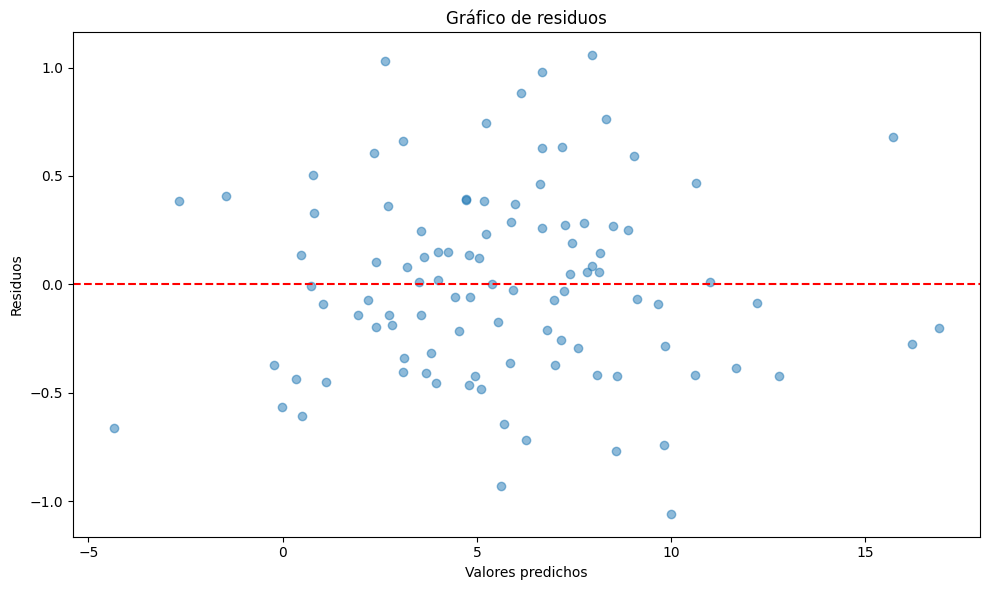

In [7]:
# Calcular R²
r2 = r2_score(y, y_pred)

print("Coeficientes verdaderos:", np.concatenate(([true_intercept], true_coeffs)))
print("Coeficientes estimados:", beta)
print("R²:", r2)

# Gráfico de residuos
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos")
plt.tight_layout()
plt.show()

## **Método Sklearn**

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [9]:
def regresion_sklearn(x, y):
  """
  Realiza regresión lineal simple con scikit-learn.

  Argumentos:
    x (numpy.ndarray): Matriz de datos independientes (n_muestras, n_caracteristicas).
    y (numpy.ndarray): Vector de datos dependientes (n_muestras,).

  Retorna:
    Un objeto LinearRegression entrenado con los datos.
  """

  # Crear e instanciar el modelo de regresión lineal
  model = LinearRegression()

  # Ajustar el modelo a los datos
  model.fit(x[:, np.newaxis], y)

  # Retornar el modelo entrenado
  return model

In [10]:
# Generar datos de ejemplo
np.random.seed(10)
x = np.random.uniform(0, 10, size=20)
y = 2 * x + 3 + np.random.normal(0, 1, size=20)

In [11]:
# Realizar regresión lineal con scikit-learn
modelo_sklearn = regresion_sklearn(x, y)

# Obtener coeficientes y R^2 con scikit-learn
print("scikit-learn:")
print("Coeficiente intersección:", modelo_sklearn.intercept_)
print("Coeficiente pendiente:", modelo_sklearn.coef_[0])
print("R^2:", modelo_sklearn.score(x[:, np.newaxis], y))

scikit-learn:
Coeficiente intersección: 2.9274117686487564
Coeficiente pendiente: 2.046072133249616
R^2: 0.9675262931030713


## **Método Statsmodels**

In [12]:
def regresion_statsmodels(x, y):
  """
  Realiza regresión lineal simple con statsmodels.

  Argumentos:
    x (numpy.ndarray): Matriz de datos independientes (n_muestras, n_caracteristicas).
    y (numpy.ndarray): Vector de datos dependientes (n_muestras,).

  Retorna:
    Un objeto OLSResults de statsmodels con los resultados de la regresión.
  """

  # Agregar constante (término independiente) a la matriz de datos independientes
  x_constante = np.hstack((np.ones((x.shape[0], 1)), x.reshape(-1, 1)))

  # Crear el modelo de regresión lineal
  modelo = sm.OLS(y, x_constante)

  # Ajustar el modelo a los datos
  resultados = modelo.fit()

  # Retornar los resultados de la regresión
  return resultados

In [13]:
# Generar datos de ejemplo
np.random.seed(10)
x = np.random.uniform(0, 10, size=20)
y = 2 * x + 3 + np.random.normal(0, 1, size=20)

In [14]:
# Realizar regresión lineal con statsmodels
modelo_statsmodels = regresion_statsmodels(x, y)

# Obtener coeficientes y R^2 con statsmodels
print("\nstatsmodels:")
print("Coeficiente intersección:", modelo_statsmodels.params[0])
print("Coeficiente pendiente:", modelo_statsmodels.params[1])
print("R^2:", modelo_statsmodels.rsquared)


statsmodels:
Coeficiente intersección: 2.927411768648751
Coeficiente pendiente: 2.046072133249617
R^2: 0.9675262931030711


## Verificación de supuestos - Regresión Lineal Multiple

In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, kstest
import numpy as np
import pandas as pd

In [59]:
# Supuestos en regresión lineal usando statsmodels

# Ejemplo de datos ficticios
np.random.seed(0)
X = np.random.normal(size=(100, 3))
beta = np.array([1.5, -2.0, 1.0])
y = X @ beta + np.random.normal(size=100)

X

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574, -2.55298982],
       [ 0.6536186 ,  0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567,  0.04575852],
       [-0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575],
       [-1.98079647, -0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985, -0.38732682],
       [-0.30230275, -1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 , -0.50965218],
       [-0.4380743 , -1.25279536,  0.77749036],
       [-1.61389785, -0.21274028, -0.89546656],
       [ 0.3869025 , -0.51080514, -1.18063218],
       [-0.02818223,  0.42833187,  0.06651722],
       [ 0.3024719 , -0.63432209, -0.36274117],
       [-0.67246045, -0.35955316, -0.813

In [60]:
# Agregar constante para la intersección
X = sm.add_constant(X)
X

array([[ 1.        ,  1.76405235,  0.40015721,  0.97873798],
       [ 1.        ,  2.2408932 ,  1.86755799, -0.97727788],
       [ 1.        ,  0.95008842, -0.15135721, -0.10321885],
       [ 1.        ,  0.4105985 ,  0.14404357,  1.45427351],
       [ 1.        ,  0.76103773,  0.12167502,  0.44386323],
       [ 1.        ,  0.33367433,  1.49407907, -0.20515826],
       [ 1.        ,  0.3130677 , -0.85409574, -2.55298982],
       [ 1.        ,  0.6536186 ,  0.8644362 , -0.74216502],
       [ 1.        ,  2.26975462, -1.45436567,  0.04575852],
       [ 1.        , -0.18718385,  1.53277921,  1.46935877],
       [ 1.        ,  0.15494743,  0.37816252, -0.88778575],
       [ 1.        , -1.98079647, -0.34791215,  0.15634897],
       [ 1.        ,  1.23029068,  1.20237985, -0.38732682],
       [ 1.        , -0.30230275, -1.04855297, -1.42001794],
       [ 1.        , -1.70627019,  1.9507754 , -0.50965218],
       [ 1.        , -0.4380743 , -1.25279536,  0.77749036],
       [ 1.        , -1.

In [63]:
X.shape

(100, 4)

In [61]:

# Ajustar el modelo
model = sm.OLS(y, X).fit()

# Predicciones y residuos
df = pd.DataFrame({'Scores': y})
df['predictions'] = model.predict(X)
df['residuals'] = df['Scores'] - df['predictions']
df

,Scores,predictions,residuals
0,1.517975,2.588581,-1.070606
1,0.307077,-1.762340,2.069417
2,1.506464,1.406004,0.100460
3,1.101906,1.635752,-0.533846
4,2.008453,1.140256,0.868197
...,...,...,...
95,3.453426,4.110346,-0.656921
96,-1.339129,-2.500010,1.160882
97,-5.248288,-6.711707,1.463419
98,-0.913404,-2.609784,1.696380


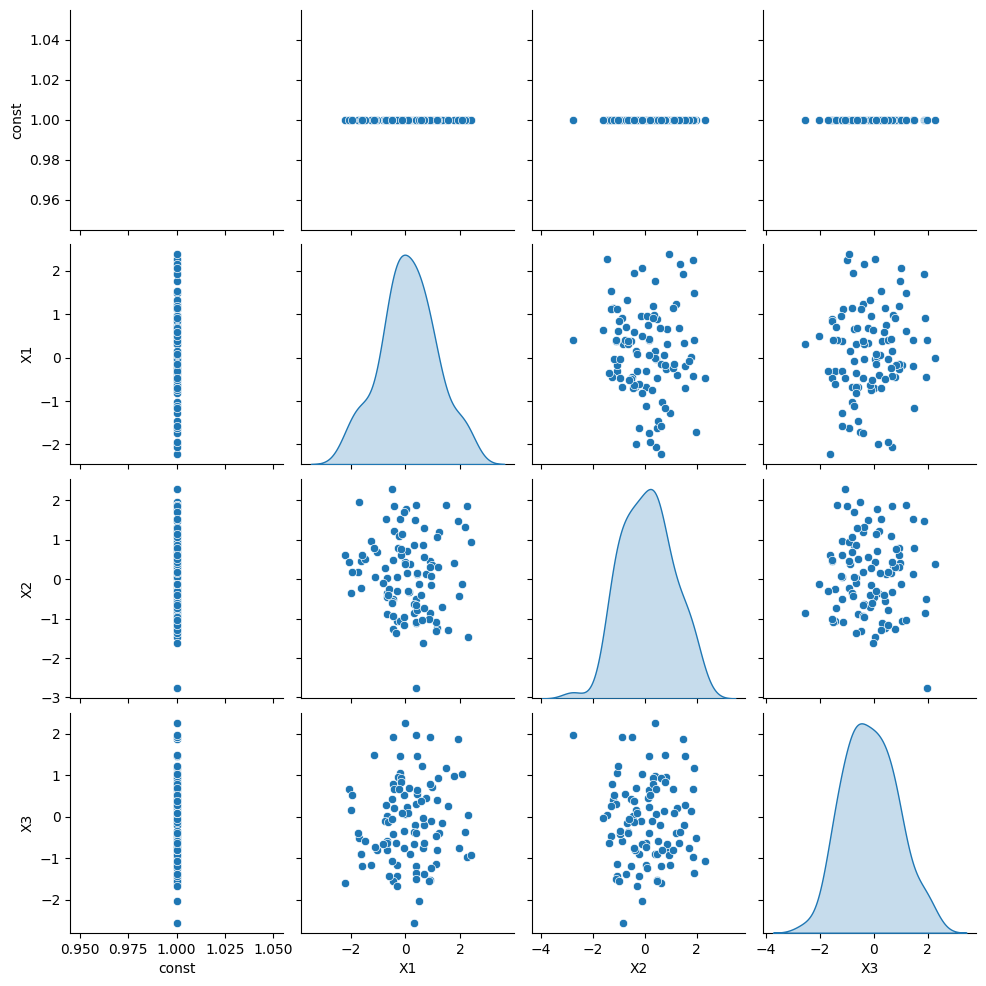

In [18]:
# 1. Linealidad - Gráfico de dispersión
sns.pairplot(pd.DataFrame(X, columns=['const', 'X1', 'X2', 'X3']), diag_kind='kde')
plt.show()

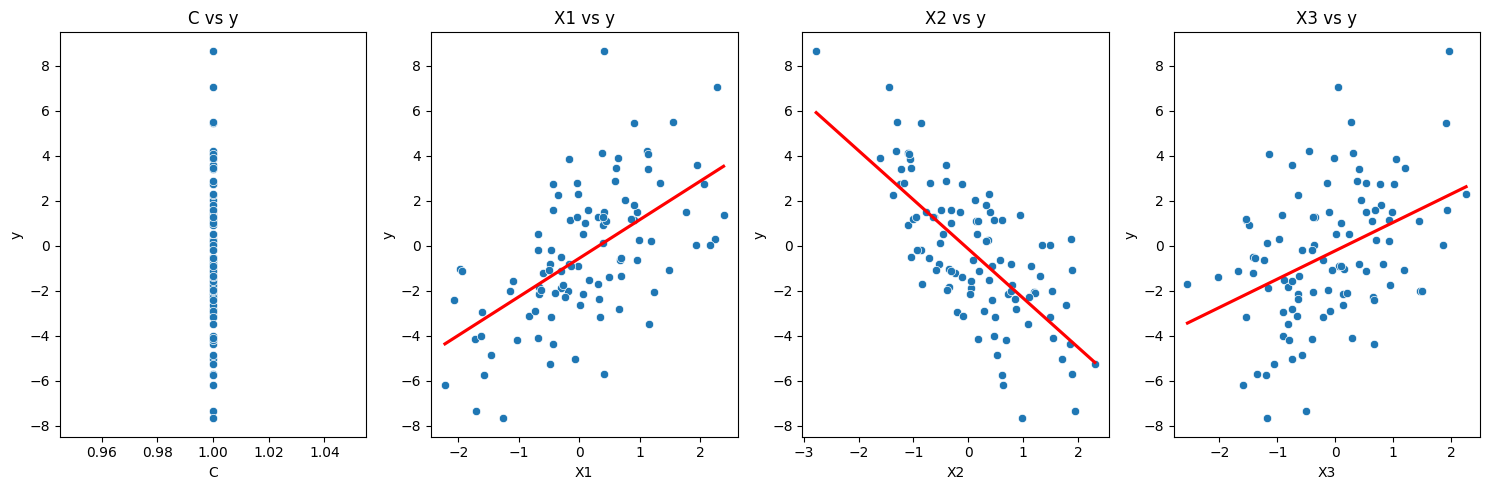

In [19]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, predictor in enumerate(['C','X1','X2','X3']):

    sns.scatterplot(x=X[:,i], y=y, ax=axs[i])
    sns.regplot(x=X[:,i], y=y, ax=axs[i], scatter=False, color='red', ci=None)
    axs[i].set_title(f'{predictor} vs y')
    axs[i].set_xlabel(predictor)
    axs[i].set_ylabel('y')

plt.tight_layout()
plt.show()

In [20]:
# 2. Independencia - Prueba de Durbin-Watson
dw = sm.stats.durbin_watson(model.resid)
print(f'Durbin-Watson: {dw}')

# Este valor está muy cercano a 2, lo que sugiere que no hay una autocorrelación significativa en los residuos.

Durbin-Watson: 2.0567844247946105


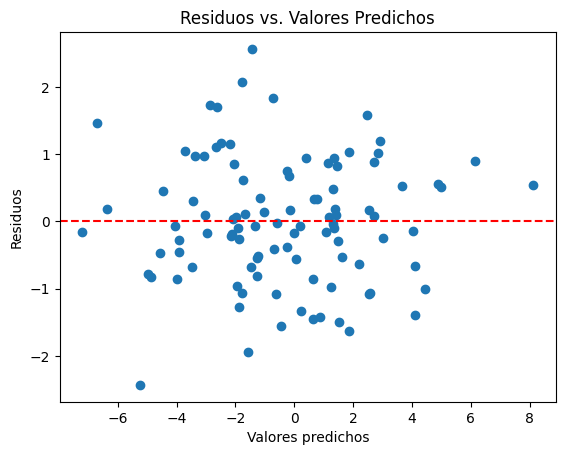

{'Lagrange multiplier statistic': 4.736856843591597, 'p-value': 0.19211145275392286, 'f-value': 1.5911654179419563, 'f p-value': 0.1965637711714427}


In [21]:
# 3. Homoscedasticidad - Gráfico de residuos vs. valores predichos
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores Predichos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Prueba de Breusch-Pagan para homoscedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(df['residuals'], X)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))
# Pueba de hipotesis
# Los residuos del modelo son homocedásticos (p-values mayores a 0.05).

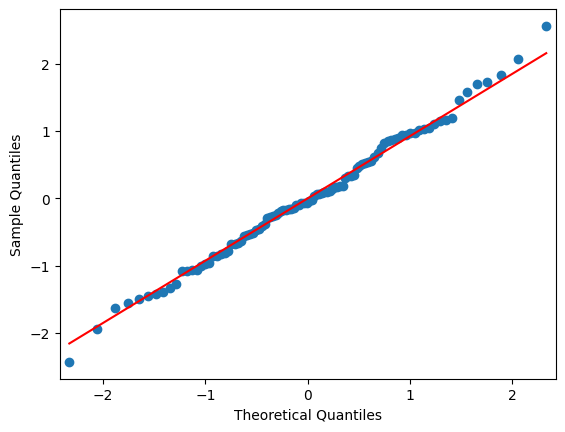

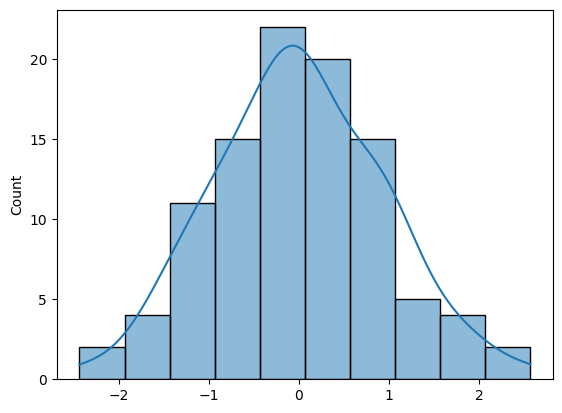

Prueba de Shapiro-Wilk: ShapiroResult(statistic=0.9955354241155252, pvalue=0.9865839083068454)
Prueba de Kolmogorov-Smirnov: KstestResult(statistic=0.06452211390295659, pvalue=0.7748065221356599, statistic_location=0.19033806431851819, statistic_sign=1)


In [22]:
# 4. Normalidad de los errores - Histograma y gráfico Q-Q
sm.qqplot(model.resid, line='s')
plt.show()

sns.histplot(model.resid, kde=True)
plt.show()

shapiro_test = shapiro(df['residuals'])
print(f'Prueba de Shapiro-Wilk: {shapiro_test}')

# Alternativamente, prueba Kolmogorov-Smirnov
ks_test = kstest(df['residuals'], 'norm')
print(f'Prueba de Kolmogorov-Smirnov: {ks_test}')

#prueba de hipotesis, mayores a 0.5 esta bien

In [23]:
# 5. Multicolinealidad - VIF
vif = pd.DataFrame()
vif['variable'] = ['const', 'X1', 'X2', 'X3']
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif)

# Se tienen valore VIF menores a 10

  variable       VIF
0    const  1.041864
1       X1  1.017871
2       X2  1.005770
3       X3  1.012785


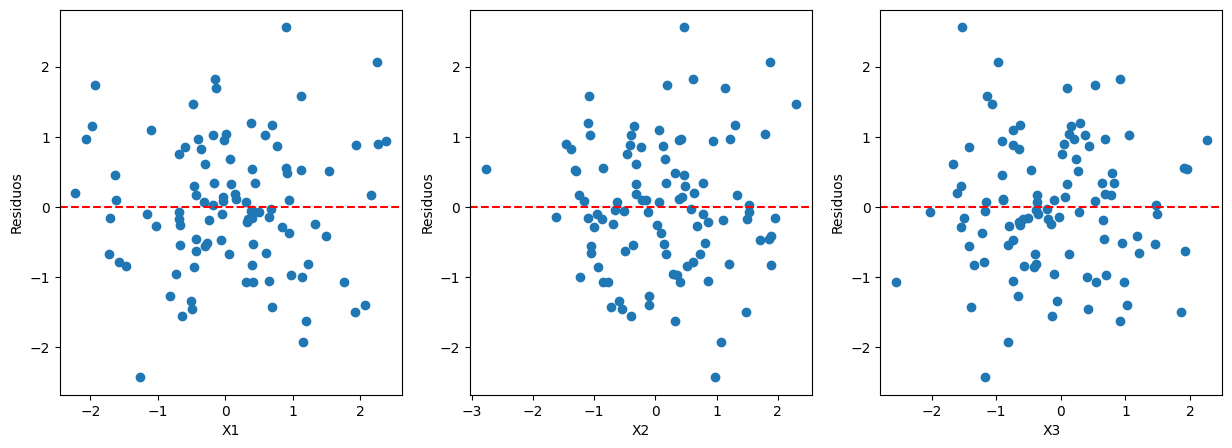

In [24]:
# 6. No correlación entre errores y variables independientes - Gráfico de residuos vs. cada predictor
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(1, 4):
    axs[i-1].scatter(X[:, i], model.resid)
    axs[i-1].set_xlabel(f'X{i}')
    axs[i-1].set_ylabel('Residuos')
    axs[i-1].axhline(y=0, color='r', linestyle='--')
plt.show()



## Verificación del rendimiento del modelo

In [25]:
# Predición del test
y_pred = model.predict(sm.add_constant(X))

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

# Evaluación del modelo

print('Mean Absolute Error:',      metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:',       metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:',  np.sqrt(metrics.mean_squared_error(y, y_pred)))

rmse_ols = np.sqrt(metrics.mean_squared_error(y, y_pred))
r2_ols=r2_score(y,y_pred)

print("")
print(f"El error (R2) es: {r2_ols}")

Mean Absolute Error: 0.7319117392988044
Mean Squared Error: 0.8583491974638519
Root Mean Squared Error: 0.9264713689390794

El error (R2) es: 0.9053071086057121


## Ridge
Buscamos el modelo óptimo y evaluamo sus métricas

In [26]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [27]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iranian_churn = fetch_ucirepo(id=563)

# data (as pandas dataframes)
df_X = pd.concat([iranian_churn.data.features,iranian_churn.data.targets],axis=1)
X = df_X[['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age','Churn'
       ]]

y =df_X['Customer Value']

In [29]:
df_X.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=101)

In [31]:
scaled_features = StandardScaler().fit_transform(X_train.values)
X_train = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)

scaled_features = StandardScaler().fit_transform(X_test.values)
X_test = pd.DataFrame(scaled_features, index=X_test.index, columns=X_test.columns)

print("Dimensión de Train: ", X_train.shape)
print("Dimensión de Train: ", X_test.shape)

Dimensión de Train:  (2362, 13)
Dimensión de Train:  (788, 13)


In [32]:
X_train.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Churn
2868,-1.057746,-0.289799,0.170262,-0.614605,-1.062537,-1.207768,-0.657587,-1.364906,-0.936906,-0.289799,1.717508,-0.686755,2.316587
3010,-0.369103,-0.289799,0.749410,-0.614605,0.258972,0.365709,-0.657587,-0.548254,0.195628,-0.289799,-0.582239,-0.114378,-0.431669
323,1.145910,-0.289799,-0.293055,3.958699,1.376490,0.243327,-0.657587,0.735056,1.328162,-0.289799,-0.582239,1.602752,-0.431669
1484,-1.057746,-0.289799,-0.408885,0.692053,0.490770,0.575505,1.587965,0.151733,-0.936906,3.450667,-0.582239,-0.686755,-0.431669
2407,0.732725,-0.289799,0.054433,0.692053,1.133187,0.837751,0.549508,0.910052,0.195628,-0.289799,-0.582239,-0.114378,-0.431669


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Funciones para encontrar los mejores parámetros

def find_best_ridge_params(X, y, alphas=np.logspace(-6, 6, 13)):
    ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
    ridge_cv.fit(X, y)
    return ridge_cv.alpha_, ridge_cv.coef_, alphas, ridge_cv.cv_values_

def find_best_lasso_params(X, y, alphas=np.logspace(-6, 6, 13)):
    lasso_cv = LassoCV(alphas=alphas, cv=5)
    lasso_cv.fit(X, y)
    return lasso_cv.alpha_, lasso_cv.coef_, alphas, lasso_cv.mse_path_

def find_best_elasticnet_params(X, y, l1_ratio=np.linspace(0.01, 1, 10), alphas=np.logspace(-6, 6, 13)):
    elasticnet_cv = ElasticNetCV(l1_ratio=l1_ratio, alphas=alphas, cv=5)
    elasticnet_cv.fit(X, y)
    return elasticnet_cv.alpha_, elasticnet_cv.l1_ratio_, elasticnet_cv.coef_

# Funciones para entrenar los modelos con los mejores parámetros

def train_ridge(X, y, alpha):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    return ridge

def train_lasso(X, y, alpha):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    return lasso

def train_elasticnet(X, y, alpha, l1_ratio):
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elasticnet.fit(X, y)
    return elasticnet

In [34]:
# Encontrar los mejores parámetros
best_ridge_alpha, ridge_coefs, ridge_alphas, ridge_cv_values = find_best_ridge_params(X_train, y_train)
best_lasso_alpha, lasso_coefs, lasso_alphas, lasso_mse_path = find_best_lasso_params(X_train, y_train)
best_elasticnet_alpha, best_elasticnet_l1_ratio, elasticnet_coefs = find_best_elasticnet_params(X_train, y_train)

c:\Users\DIEGO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
c:\Users\DIEGO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
best_ridge_alpha

1.0

In [36]:
best_lasso_alpha

0.1

In [37]:
best_elasticnet_alpha, best_elasticnet_l1_ratio

(0.1, 1.0)

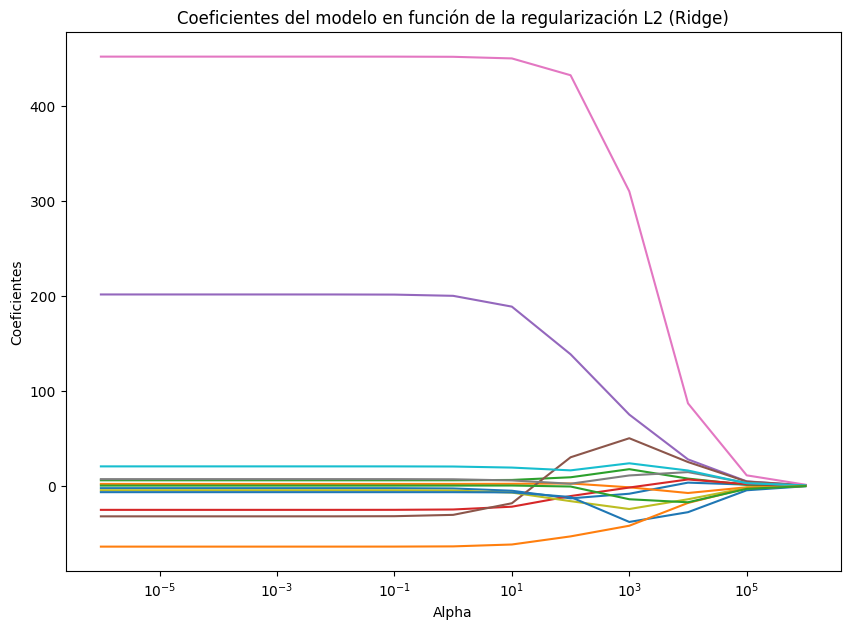

In [38]:
# Evolución de los coeficientes en función de alpha

alphas = ridge_alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización L2 (Ridge)');
plt.axis('tight')
plt.show()

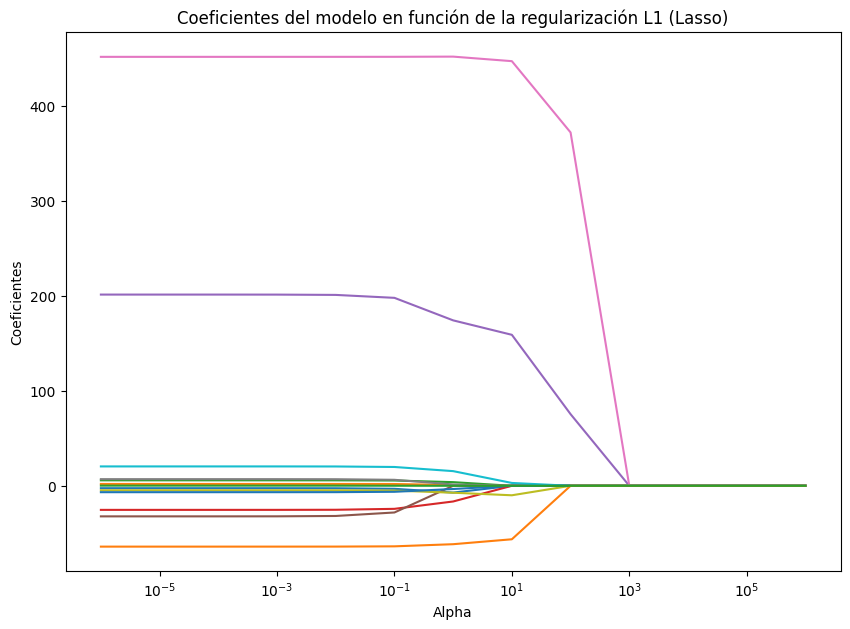

In [39]:
# Evolución de los coeficientes en función de alpha

alphas = lasso_alphas
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización L1 (Lasso)');
plt.axis('tight')
plt.show()

In [40]:
# Entrenar los modelos
ridge_model = train_ridge(X_train, y_train, best_ridge_alpha)
lasso_model = train_lasso(X_train, y_train, best_lasso_alpha)
elasticnet_model = train_elasticnet(X_train, y_train, best_elasticnet_alpha, best_elasticnet_l1_ratio)

Text(0.5, 1.0, 'Coeficientes del modelo Ridge')

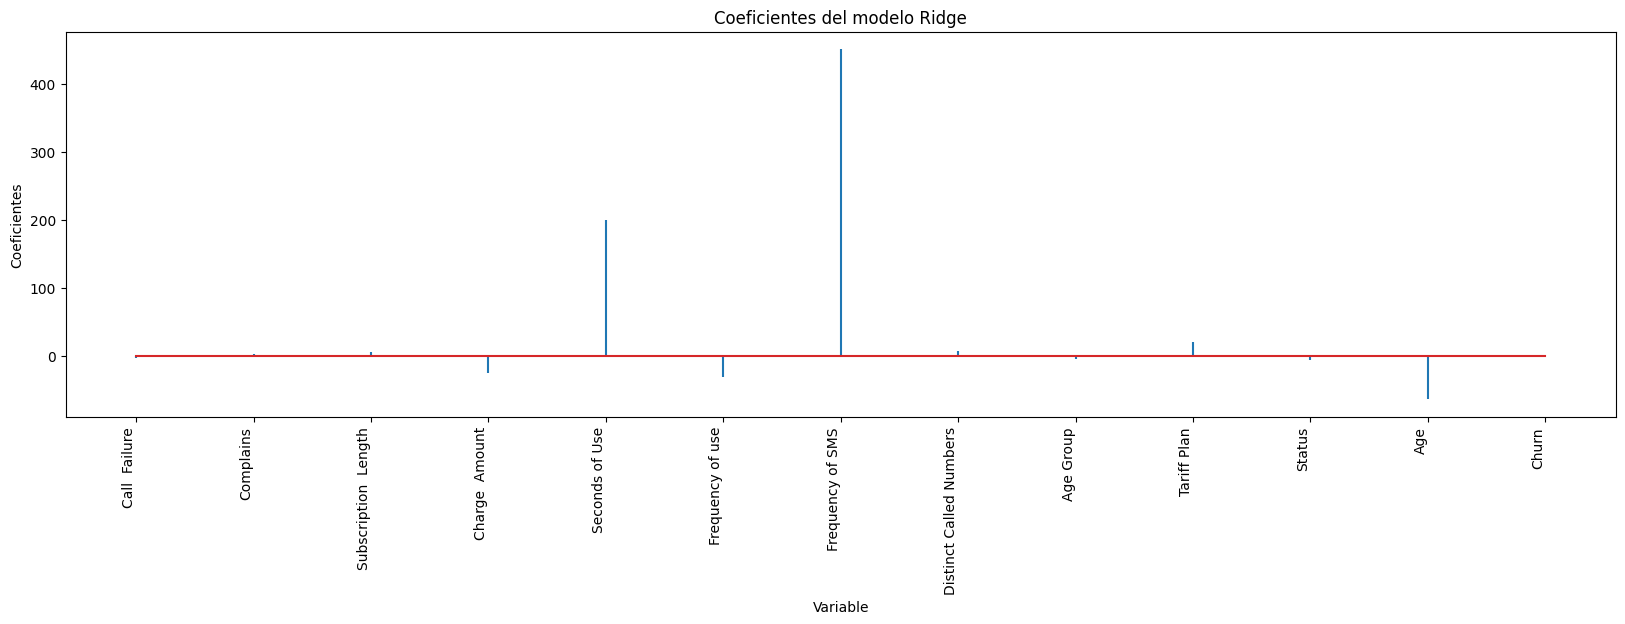

In [41]:
# Coeficientes del modelo Ridge
# ==============================================================================

df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': ridge_model.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo Ridge')

Text(0.5, 1.0, 'Coeficientes del modelo Lasso')

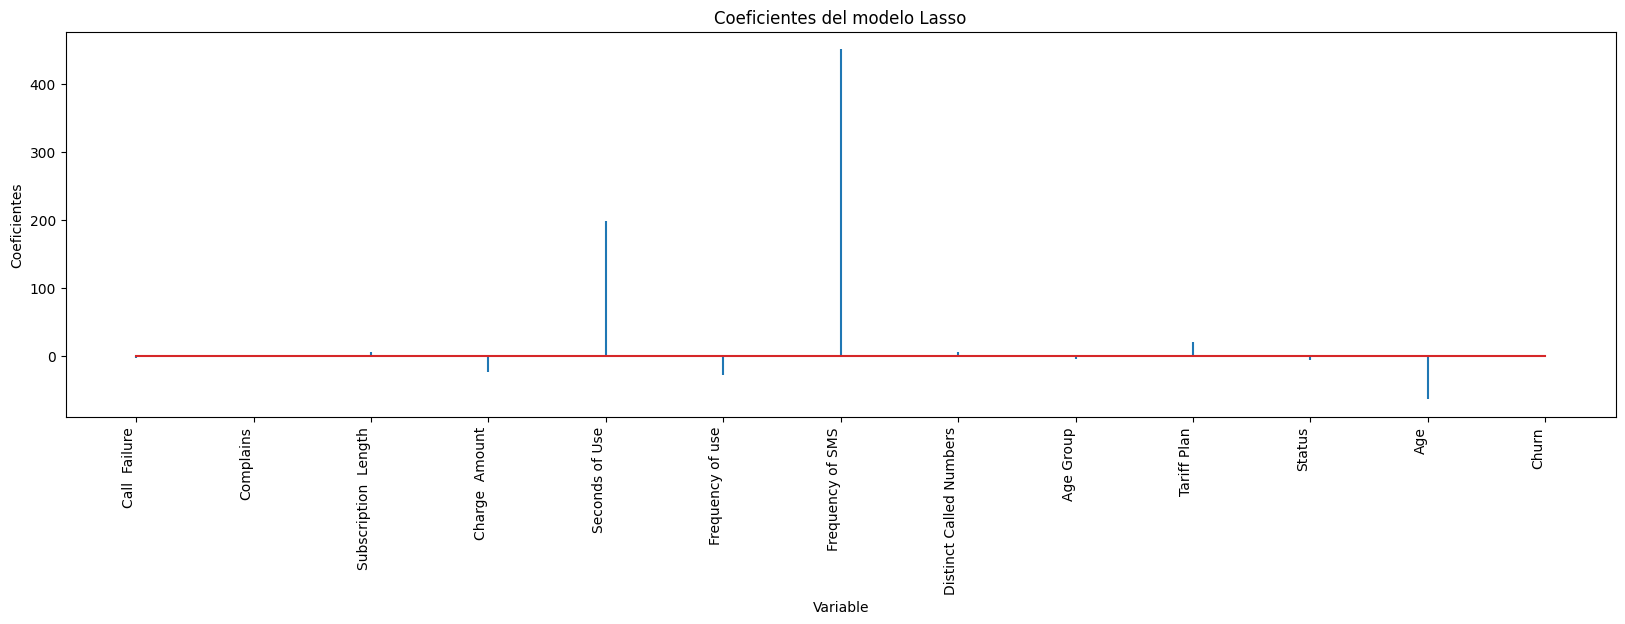

In [42]:
# Coeficientes del modelo Lasso
# ==============================================================================

df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': lasso_model.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo Lasso')

Text(0.5, 1.0, 'Coeficientes del modelo ElasticNet')

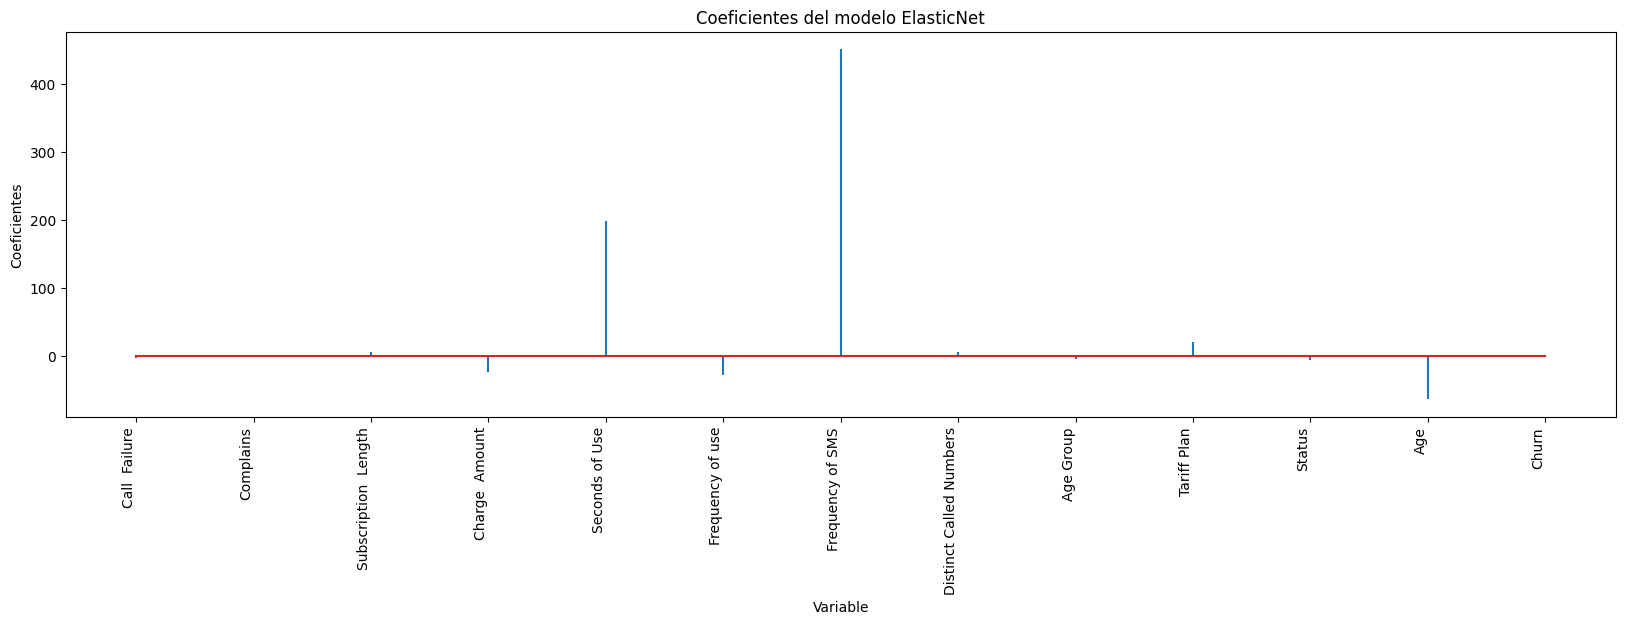

In [43]:
# Coeficientes del modelo ElasticNet
# ==============================================================================

df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': elasticnet_model.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo ElasticNet')

In [44]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_regression_metrics(y_true, y_pred):
    """
    Calcula métricas de regresión lineal.

    Parameters:
    - y_true: array-like, Valores verdaderos.
    - y_pred: array-like, Valores predichos.

    Returns:
    - metrics: dict, Diccionario que contiene las métricas calculadas.
    """
    # Calcular métricas de regresión
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Calcular el número de muestras y características
    n_samples = len(y_true)
    n_features = 1  # Cambia este valor si estás trabajando con múltiples características

    # Calcular R² ajustado
    r2_adj = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

    # Guardar métricas en un diccionario
    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R^2': r2,
        'R^2 ajustado': r2_adj
    }

    return metrics

In [45]:
# Evaluar los modelos
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
elasticnet_pred = elasticnet_model.predict(X_test)

resultados = pd.concat([pd.DataFrame([calculate_regression_metrics(y_test, ridge_pred)]),
          pd.DataFrame([calculate_regression_metrics(y_test, lasso_pred)]),
          pd.DataFrame([calculate_regression_metrics(y_test, elasticnet_pred)])]
          ).T
resultados.columns = ['Rigde','Lasso','ElasticNet']

In [46]:
resultados

,Rigde,Lasso,ElasticNet
MSE,4870.194566,4869.822666,4869.822666
RMSE,69.786779,69.784115,69.784115
MAE,43.842167,43.736473,43.736473
R^2,0.981552,0.981553,0.981553
R^2 ajustado,0.981528,0.981530,0.981530


# **Regresión Logística**

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # Esto es la función sigmoide

In [48]:
# Generar datos sintéticos
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = (X > 5).astype(int).ravel()

# Añadir un sesgo a los datos
X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [49]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_proba(X, theta):
    return sigmoid(X @ theta)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [50]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-10, 10, 100)

loss_values = np.zeros((100, 100))

for i, t0 in enumerate(theta_0):
    for j, t1 in enumerate(theta_1):
        theta = np.array([t0, t1])
        y_pred = predict_proba(X_b, theta)
        loss_values[i, j] = mse_loss(y, y_pred)

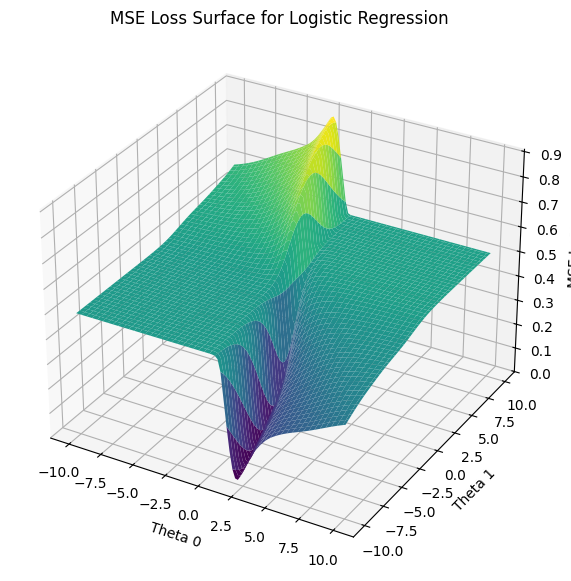

In [51]:
T0, T1 = np.meshgrid(theta_0, theta_1)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, loss_values, cmap='viridis')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('MSE Loss')
ax.set_title('MSE Loss Surface for Logistic Regression')
plt.show()

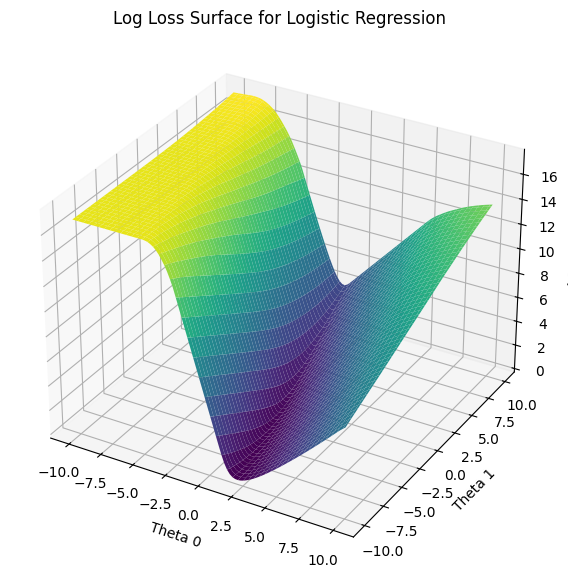

In [52]:
for i, t0 in enumerate(theta_0):
    for j, t1 in enumerate(theta_1):
        theta = np.array([t0, t1])
        y_pred = predict_proba(X_b, theta)
        loss_values[i, j] = log_loss(y, y_pred)

# Visualizar la función de pérdida
T0, T1 = np.meshgrid(theta_0, theta_1)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, loss_values, cmap='viridis')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Log Loss')
ax.set_title('Log Loss Surface for Logistic Regression')
plt.show()

### Simple

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss

# Función de Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de pérdida de Log-Loss
def compute_loss(y_true, y_pred):
    return log_loss(y_true, y_pred)

# Gradiente de la función de pérdida
def compute_gradient(X, y, weights):
    y_pred = sigmoid(np.dot(X, weights))
    error = y_pred - y
    gradient = np.dot(X.T, error) / len(y)
    return gradient

# Descenso del gradiente para la regresión logística
def gradient_descent(X, y, weights, learning_rate, num_iterations):
    loss_history = []
    weights_history = [weights.copy()]

    for i in range(num_iterations):
        gradient = compute_gradient(X, y, weights)
        weights -= learning_rate * gradient
        weights_history.append(weights.copy())
        loss = compute_loss(y, sigmoid(np.dot(X, weights)))
        loss_history.append(loss)
        if i % 100 == 0:
            print(f'Iteración {i}, Pérdida: {loss}')

    return weights, loss_history, weights_history

In [54]:
# Cargar y preparar los datos
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)
y = y.astype(float)

# Añadir una columna de unos para el intercepto
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los pesos y parámetros
weights = np.zeros(X_train.shape[1])
learning_rate = 0.1
num_iterations = 1000

# Entrenar el modelo
weights, loss_history, weights_history = gradient_descent(X_train, y_train, weights, learning_rate, num_iterations)

# Predicciones en el conjunto de prueba
y_pred_prob = sigmoid(np.dot(X_test, weights))
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'AUC-ROC: {auc}')

Iteración 0, Pérdida: 0.6702930002809514
Iteración 100, Pérdida: 0.1737210875532963
Iteración 200, Pérdida: 0.12598921334751875
Iteración 300, Pérdida: 0.1095729287997276
Iteración 400, Pérdida: 0.10164510313123007
Iteración 500, Pérdida: 0.09714934273263305
Iteración 600, Pérdida: 0.09434782025231106
Iteración 700, Pérdida: 0.09249022329620535
Iteración 800, Pérdida: 0.09120311717564249
Iteración 900, Pérdida: 0.09028158043245595
Accuracy: 1.0
AUC-ROC: 1.0


MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

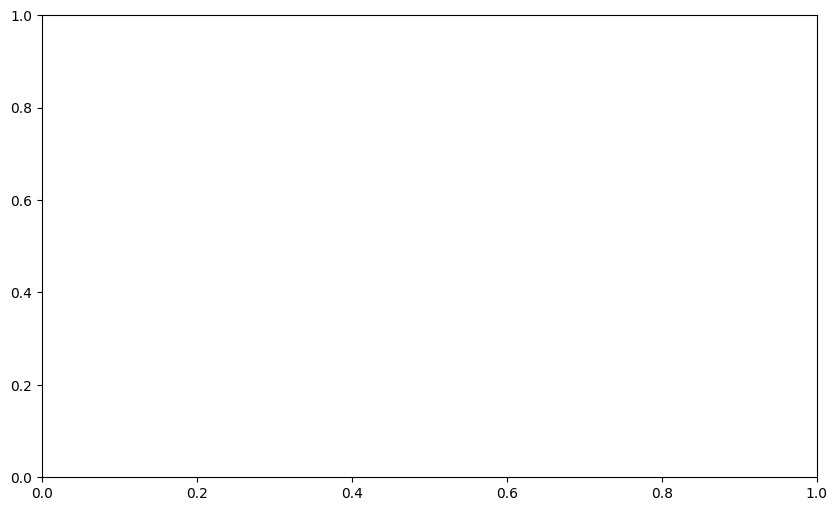

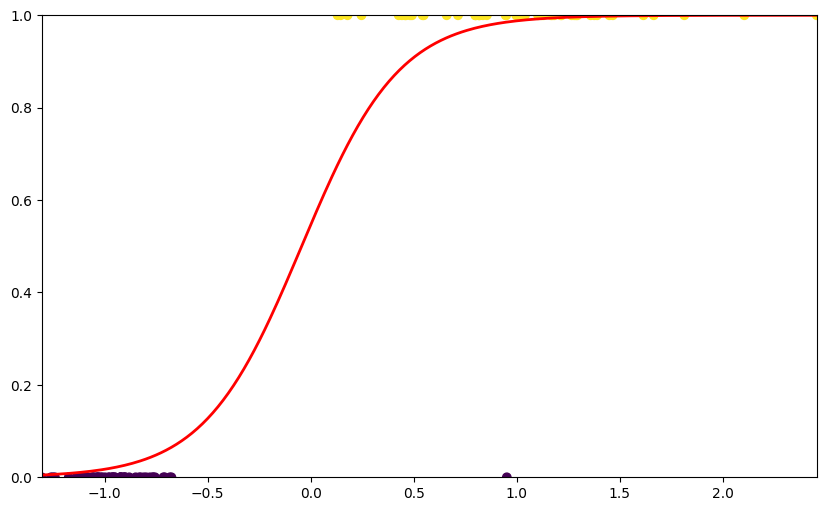

In [55]:
# Crear la figura para la animación
fig, ax = plt.subplots(figsize=(10, 6))

# Inicialización de la gráfica
def init():
    ax.set_xlim(X[:, 1].min(), X[:, 1].max())
    ax.set_ylim(0, 1)
    line.set_data([], [])
    return line,

# Actualización de la gráfica
def animate(i):
    current_weights = weights_history[i]
    x_values = np.linspace(X[:, 1].min(), X[:, 1].max(), 300)
    y_values = sigmoid(current_weights[0] + current_weights[1] * x_values)
    line.set_data(x_values, y_values)
    return line,

# Crear la animación de la curva sigmoide
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(X[:, 1].min(), X[:, 1].max())
ax.set_ylim(0, 1)
ax.scatter(X[:, 1], y, c=y, cmap='viridis')
line, = ax.plot([], [], 'r-', lw=2)

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=num_iterations, interval=20, blit=True)

# Guardar la animación como video
ani.save('logistic_regression_training.mp4', writer='ffmpeg', fps=30)

# Mostrar la animación
# plt.show()

# Graficar la función de pérdida
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), loss_history, 'b-')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Pérdida (Log-Loss)')
plt.title('Descenso del Gradiente')
# plt.show()

In [ ]:
from IPython.display import Video

# Reemplaza 'nombre_del_archivo.mp4' con la ruta a tu archivo MP4
Video('/content/logistic_regression_training.mp4', embed=True)

## Multiple

In [57]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# Supuestos en regresión logística usando statsmodels

# Ejemplo de datos ficticios
np.random.seed(0)
X = np.random.normal(size=(100, 3))
beta = np.array([0.5, -1.5, 2.0])
log_odds = X @ beta
prob = 1 / (1 + np.exp(-log_odds))
y = np.random.binomial(1, prob, size=100)

# Agregar constante para la intersección
# X = sm.add_constant(X_train)
# y = y_train
# Ajustar el modelo
logit_model = sm.Logit(y, X).fit()
y

Optimization terminated successfully.
         Current function value: 0.403513
         Iterations 7


array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [ ]:
# 1. Independencia de las Observaciones - Prueba de Durbin-Watson en modelos temporales (solo ilustrativo)
dw = sm.stats.durbin_watson(logit_model.resid_generalized)
print(f'Durbin-Watson: {dw}')

Durbin-Watson: 2.1483904356248096


In [ ]:
# 2. Relación Lineal entre las Variables Independientes y el Logit
# Test de Box-Tidwell
X_transformed = np.column_stack([X, np.log(np.abs(X[:, 1:] + 1e-10)) * X[:, 1:]])
logit_model_transformed = sm.Logit(y, X_transformed).fit()
print(logit_model_transformed.summary())

Optimization terminated successfully.
         Current function value: 0.399581
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Tue, 13 Aug 2024   Pseudo R-squ.:                  0.4175
Time:                        22:22:01   Log-Likelihood:                -39.958
converged:                       True   LL-Null:                       -68.593
Covariance Type:            nonrobust   LLR p-value:                 1.086e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9504      0.311      3.058      0.002       0.341       1.560
x2            -0.9156      0.

In [ ]:
# 3. Multicolinealidad - VIF
vif = pd.DataFrame()
vif['variable'] = ['X1', 'X2', 'X3'] # Remove 'const' row
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif

,variable,VIF
0,X1,1.013256
1,X2,1.004907
2,X3,1.010555


In [ ]:
# 4. Outliers Influyentes - Residuos estandarizados y DFBETAS
influence = logit_model.get_influence()
summary_frame = influence.summary_frame()
# summary_frame[['standard_resid', 'dfb_const', 'dfb_x1', 'dfb_x2', 'dfb_x3']]

# Identificar outliers influyentes
outliers = summary_frame[np.abs(summary_frame['standard_resid']) > 3]
outliers

,dfb_x1,dfb_x2,dfb_x3,cooks_d,standard_resid,hat_diag,dffits_internal
63,-0.589864,0.538158,-0.391917,0.179110,-5.021939,0.020861,-0.733029
83,-0.550702,0.324131,-0.423853,0.130039,4.499276,0.018907,0.624594


## Evaluación del rendimiento

Matriz de confusión:
 [[88 18]
 [12 82]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       106
           1       0.82      0.87      0.85        94

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

ROC AUC: 0.94


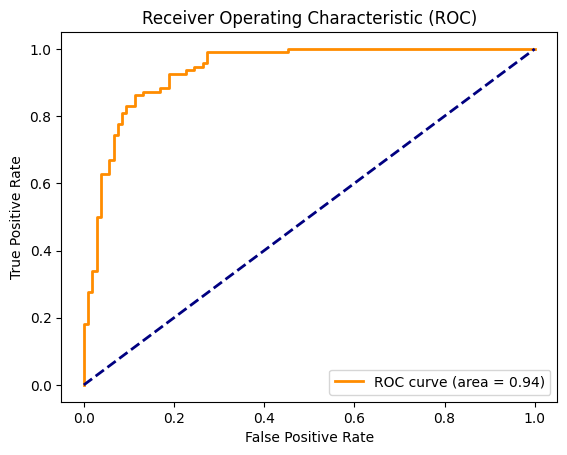

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Generar datos ficticios
np.random.seed(0)
X = np.random.normal(size=(1000, 3))
beta = np.array([0.5, -1.5, 2.0])
log_odds = X @ beta
prob = 1 / (1 + np.exp(-log_odds))
y = np.random.binomial(1, prob, size=1000)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Ajustar el modelo de regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predicciones
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("Reporte de clasificación:\n", class_report)

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc:.2f}')

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()